## Challenge 2: Create an Exploratory Data Analysis on any desired dataset of your choosing
E. Thompson

#### Using A Sleep Efficiency Dataset: 
https://www.kaggle.com/datasets/equilibriumm/sleep-efficiency

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Load data into dataframe:

In [5]:
df = pd.read_csv('Sleep_Efficiency.csv')
df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [4]:
df.tail()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,NaN,3.0,Yes,0.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0
451,452,18,Male,2021-03-17 02:30:00,2021-03-17 10:00:00,7.5,0.63,22,23,55,1.0,50.0,0.0,No,1.0


#### Checking the data types:

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      452 non-null    int64         
 1   Age                     452 non-null    int64         
 2   Gender                  452 non-null    object        
 3   Bedtime                 452 non-null    datetime64[ns]
 4   Wakeup time             452 non-null    datetime64[ns]
 5   Sleep duration          452 non-null    float64       
 6   Sleep efficiency        452 non-null    float64       
 7   REM sleep percentage    452 non-null    int64         
 8   Deep sleep percentage   452 non-null    int64         
 9   Light sleep percentage  452 non-null    int64         
 10  Awakenings              432 non-null    float64       
 11  Caffeine consumption    427 non-null    float64       
 12  Alcohol consumption     438 non-null    float64   

In [30]:
# Dropping columns that are not needed in this notebook:
df.drop(['ID','Bedtime','Wakeup time'], inplace=True, axis=1)

Null values exist for Awakenings, Caffeine consumption, Alcohol consumption and Exercise frequency.

In [31]:
print(df.isnull().sum())

Age                        0
Gender                     0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64


In [32]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 12)


There are no duplicated rows in the dataset.

The reason for the null values is unknown - the information might not have been recorded because it was unavailable, or entered as null instead of 0.
If this were a real task, it would be best to ask whoever provided the data. 

It is safer to simply drop the rows, in order to avoid introducing any bias. However, for the purposes of this exercise, I will also demonstrate changing Awakenings to 0 where they are null, as if I were told that this was an error whereas Caffeine, Alcohol and Exercise are unknowns (the sleepers forgot to record it or couldn't recall).

In [33]:
# Demonstrating changing Awakenings:
df_changed = df.copy()
df_changed['Awakenings'].fillna(0, inplace=True)
print(df_changed.isnull().sum())

Age                        0
Gender                     0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                 0
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64


In [34]:
# Dropping all rows containing null values (using the original dataframe):
df = df.dropna()
df.count()

Age                       388
Gender                    388
Sleep duration            388
Sleep efficiency          388
REM sleep percentage      388
Deep sleep percentage     388
Light sleep percentage    388
Awakenings                388
Caffeine consumption      388
Alcohol consumption       388
Smoking status            388
Exercise frequency        388
dtype: int64

In [35]:
print(df.isnull().sum())

Age                       0
Gender                    0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
dtype: int64


In [36]:
df.describe()

,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,40.829897,7.451031,0.789253,22.680412,52.822165,24.497423,1.618557,22.680412,1.146907,1.757732
std,13.403187,0.883483,0.135706,3.430510,15.571518,15.309638,1.355958,28.997566,1.612793,1.447824
min,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,7.000000,0.700000,20.000000,51.000000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,41.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,0.000000,0.000000,2.000000
75%,52.000000,8.000000,0.900000,25.000000,63.000000,24.000000,3.000000,50.000000,2.000000,3.000000
max,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000


#### Looking at distibutions and outliers:

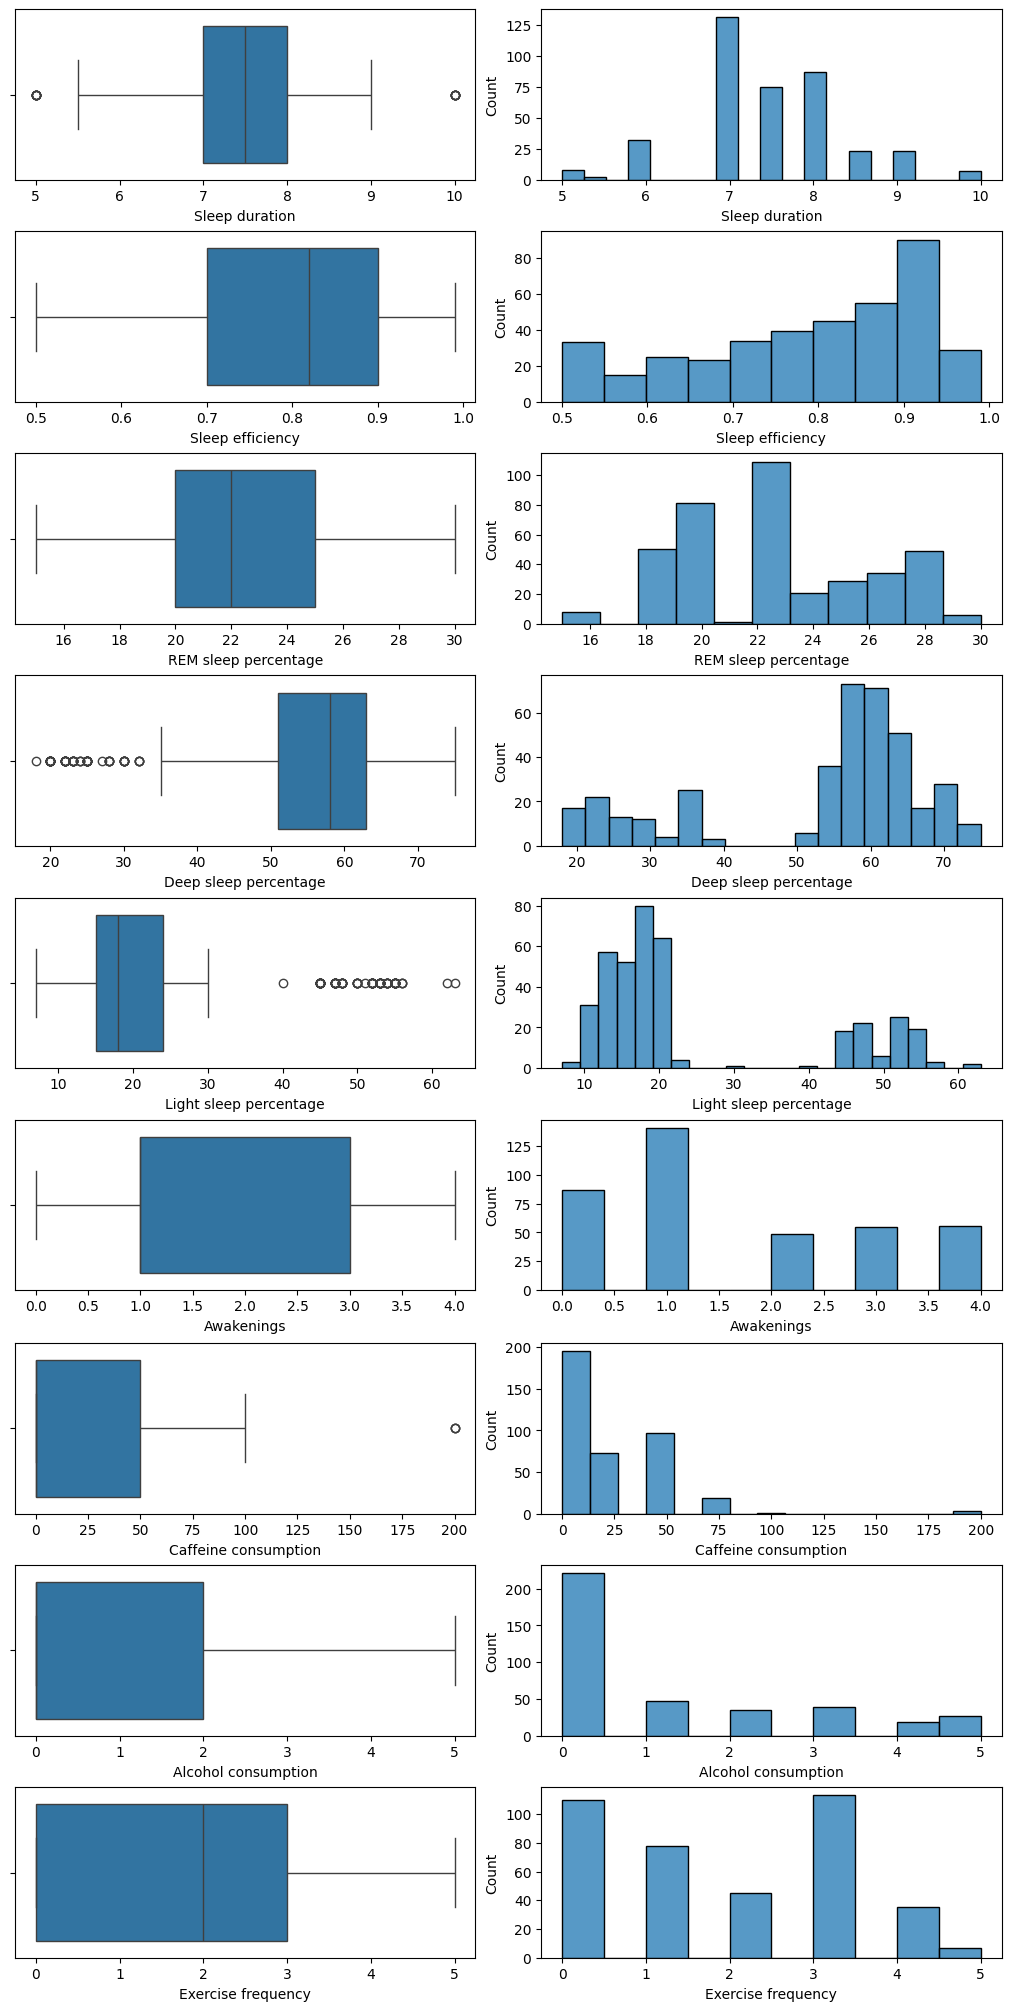

In [37]:
fig, ax = plt.subplots(9,2, layout='constrained', figsize=(10, 20))

columns = ['Sleep duration','Sleep efficiency', 
           'REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage', 
           'Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']

for i, column in enumerate(columns):
    sns.boxplot(x=df[column], ax=ax[i][0])
    sns.histplot(x=df[column], ax=ax[i][1])

Not many outliers are seen in the data, other than one high value for caffeine consumption and a high and low value for sleep duration. The box plots for light and deep sleep percentages are not as useful because the distribution plots show them to have a bimodal distribution.

#### Creating a heatmap to examine correlations:

,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
Age,1.000000,-0.065951,0.124093,0.015449,0.058156,-0.062613,-0.004006,-0.169057,0.069295,0.071241
Sleep duration,-0.065951,1.000000,-0.019164,-0.015408,-0.035477,0.039536,-0.009162,-0.030922,-0.048436,-0.046671
Sleep efficiency,0.124093,-0.019164,1.000000,0.064038,0.789087,-0.816934,-0.567885,0.070804,-0.397012,0.266050
REM sleep percentage,0.015449,-0.015408,0.064038,1.000000,-0.185850,-0.035046,-0.024608,0.113965,-0.039597,0.044200
Deep sleep percentage,0.058156,-0.035477,0.789087,-0.185850,1.000000,-0.975461,-0.327284,-0.024522,-0.374614,0.171841
Light sleep percentage,-0.062613,0.039536,-0.816934,-0.035046,-0.975461,1.000000,0.338397,-0.000596,0.389895,-0.184684
Awakenings,-0.004006,-0.009162,-0.567885,-0.024608,-0.327284,0.338397,1.000000,-0.112922,0.210017,-0.231464
Caffeine consumption,-0.169057,-0.030922,0.070804,0.113965,-0.024522,-0.000596,-0.112922,1.000000,-0.097674,-0.082661
Alcohol consumption,0.069295,-0.048436,-0.397012,-0.039597,-0.374614,0.389895,0.210017,-0.097674,1.000000,0.004215
Exercise frequency,0.071241,-0.046671,0.266050,0.044200,0.171841,-0.184684,-0.231464,-0.082661,0.004215,1.000000


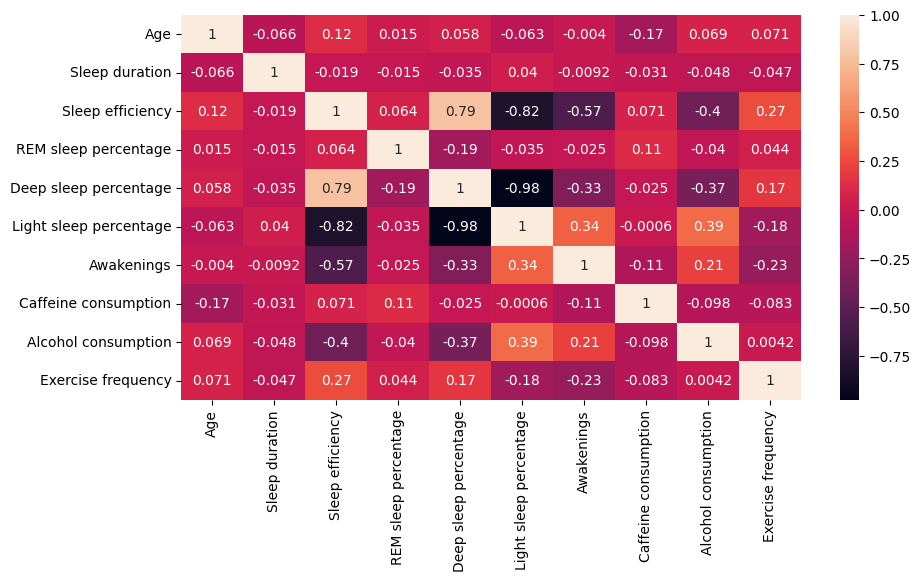

In [40]:
plt.figure(figsize=(10, 5))
c= df.iloc[:, [0,2,3,4,5,6,7,8,9,11]].corr()
sns.heatmap(c, annot=True)
c

There seem to be slight positive correlations between sleep efficiency and exercise frequency, and a negative correlation between alcohol consumption and sleep efficiency. A higher sleep efficiency looks to be determined by having a high deep sleep percentage, low light sleep percentage and low awakenings. REM sleep percentage does not correlate as highly with sleep efficiency as these other measures. Light sleep percentage shows a positive correlation with awakenings, which makes sense.

Sleep duration does not appear to be strongly correlated with any of the other measures.

#### Creating plots to compare the sleep of male and female, smokers and non-smokers:

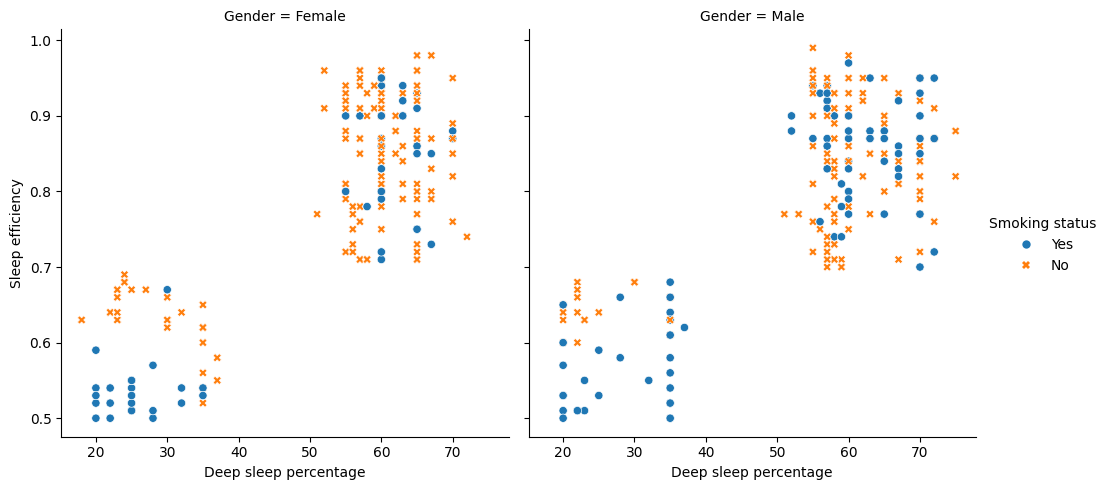

In [55]:
sns.relplot(data=df,
            x='Deep sleep percentage', y='Sleep efficiency', col='Gender',
            hue='Smoking status', style='Smoking status')

Scatterplots are not that helpful with this dataset, as many of the measures appear to be catagorical rather than continuous.

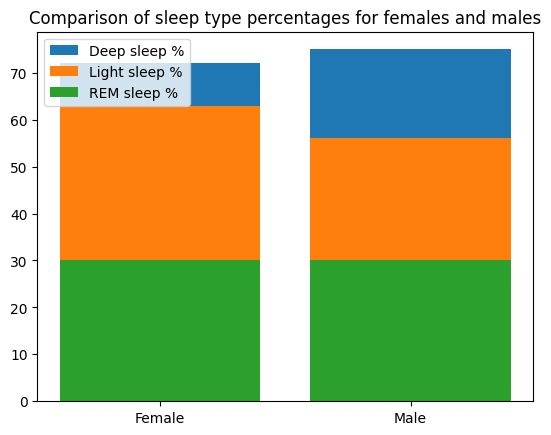

In [53]:
x = df['Gender']
plt.bar(x, df['Deep sleep percentage'], label='Deep sleep %')
plt.bar(x, df['Light sleep percentage'], label='Light sleep %')
plt.bar(x, df['REM sleep percentage'], label='REM sleep %')
plt.legend()
plt.title('Comparison of sleep type percentages for females and males')
plt.show()

This is a more useful comparison, revealing that males and females have a similar REM %, but males have a greater proportion of deep sleep to light sleep than females. Interestingly, the percentages do not appear to total 100%.

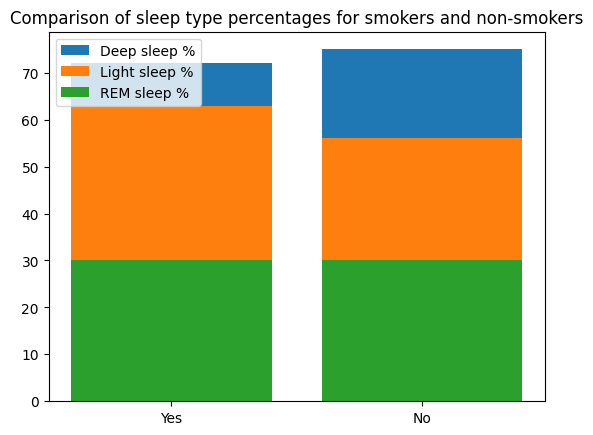

In [57]:
x = df['Smoking status']
plt.bar(x, df['Deep sleep percentage'], label='Deep sleep %')
plt.bar(x, df['Light sleep percentage'], label='Light sleep %')
plt.bar(x, df['REM sleep percentage'], label='REM sleep %')
plt.legend()
plt.title('Comparison of sleep type percentages for smokers and non-smokers')
plt.show()

Smokers appear to get less deep sleep and more light sleep in comparison to non-smokers.

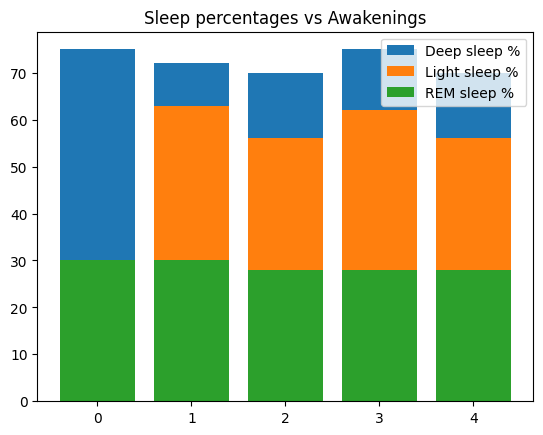

In [58]:
x = df['Awakenings']
plt.bar(x, df['Deep sleep percentage'], label='Deep sleep %')
plt.bar(x, df['Light sleep percentage'], label='Light sleep %')
plt.bar(x, df['REM sleep percentage'], label='REM sleep %')
plt.legend()
plt.title('Sleep percentages vs Awakenings')
plt.show()

This plot shows that when there are no awakenings, the subjects do not have any periods of light sleep. Deep sleep is greatly reduced by even a single awakening.